# E3. Camera Sticker_ Face detection 

### 프로젝트 : 고양이 수염 🐱 스티커 만들기

`12 JAN 2021`

-------------



> 1. 스티커 구하기 or 만들기
> 2. 얼굴 검출 & 랜드마크 검출 하기
> 3. 스티커 적용 위치 확인하기
> 4. 스티커 적용하기
> 5. 문제점 찾아보기


### 1. 필요한 라이브러리 import

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

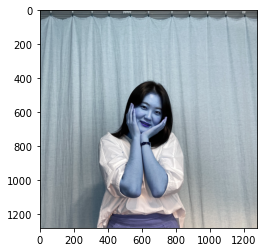

In [3]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1280))    # 1280x1280의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()  #사진을 보여주세요!

#### + 여기서 잠깐~!

🧐❓왜사진이 푸른색일까? 

opencv의 특징 : matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 **RGB(빨강, 녹색, 파랑)** 순으로 사용한ㄷ. 그런데 opencv는 예외적으로 **BGR(파랑, 녹색, 빨강)** 을 사용한ㄷ. 그래서 여러분의 원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력된 것이다. 그래서, opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 아래와 같은 색깔 보정처리를 해줘야한다.

opencv는 아주 강력하고 방대한 기능을 갖춘 컴퓨터 비전 라이브러리이다. 영상 관련 업계 표준 라이브러리의 지위를 가지고 있다고 할 수 있다.

이미지 읽기의 flag는 3가지가 있습니다.

- `cv2.IMREAD_COLOR` : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
  

- `cv2.IMREAD_GRAYSCALE` : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용-합니다.

   
- `cv2.IMREAD_UNCHANGED` : 이미지파일을 alpha channel까지 포함하여 읽어 들입니다.

   
3개의 flag대신에 1, 0, -1을 사용해도 된다.

cv2.imread('img.png', 0)이라고 호출했다면 이미지를 Grayscale로 읽어 들이겠다는 뜻입니다

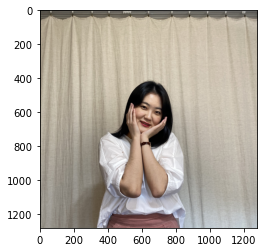

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요!!!  # BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

###  2. 얼굴 검출 & 랜드마크 검출 하기

dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아보즈아~

In [5]:
#import dlib 여기서 필요한 라이브러리 입니당
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

**+ dilb?은 무엇인가~?**

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해 주어야한다. 

detector_hog의 두 번째 파라미터는 이미지 피라미드의 수입니다. 이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다.

이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능합니다. 

`HOG(Histogram of Oriented Gradient) feature`

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # BGR -> RGB

dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(531, 531) (716, 717)]]


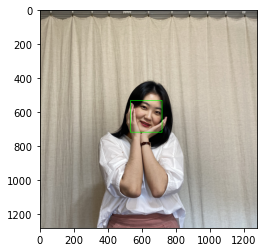

In [7]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
#cv2.rectangle(img, (start point), (end point), line's color, line's thickness, linetype)
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 4. 얼굴 랜드마크 face landmark


이목구비의 위치를 추론하는 것을 face landmark localization 기술이라고 한다.

face landmark는 detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용한다.

**Object keypoint estimation 알고리즘**

Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 한ㄷ.

keypoint를 찾는 알고리즘은 크게 `top-down`와 `bottom-up`이 있다.



1) `top-down` : bounding box를 찾고 box 내부의 keypoint를 예측

2) `bottom-up` : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성




### + Dlib landmark localization


잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾습니다.


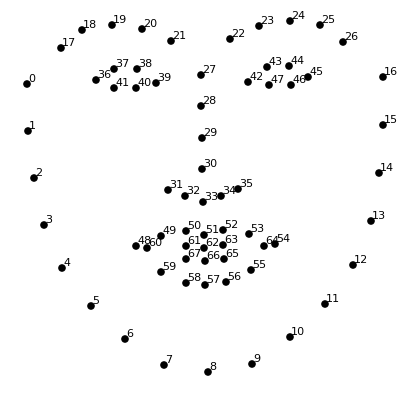




In [8]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


#landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
#dlib.full_object_detection 를 반환한다.

In [9]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))
    
    #list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

68


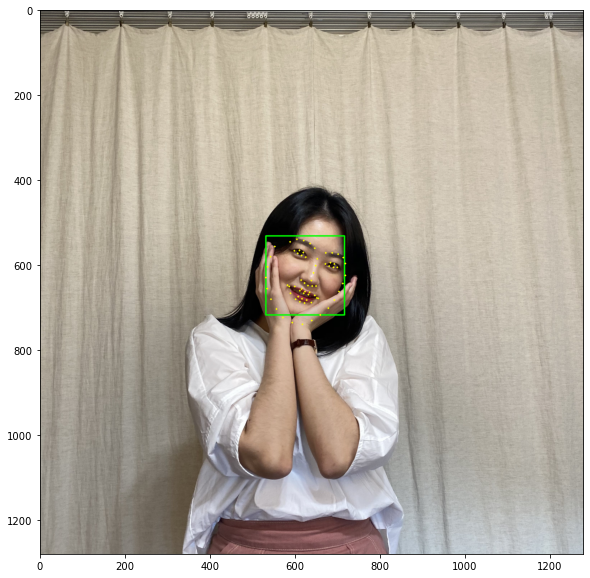

In [10]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)  #(255,255,0) = cyan color
                                                           #(255,0,255) = Magenta color    
plt.figure(figsize=(10, 10))                               #(0,255,255) = yellow color
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3-5. 스티커 적용하기


얼굴 위치, 카메라와의 거리에 따라 픽셀 x가 다르기 때문에 비율로 계산을 해줘야 한다.

- 2, 36, 48, 30 번 인덱스를 이용 -> 이 힌트를 사용해보려고 했는데 스티커가 자꾸 너무 꾸깃?해져서 변경

#### 좌표 확인하기

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[2])  # left cheek index : 2
    x = landmark[30][0]   
    y = landmark[30][1]   
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y): (%d, %d)'%(x,y))
    print('(w,h): (%d, %d)'%(w,h))

(535, 604)
(x,y): (638, 636)
(w,h): (186, 186)


#### 스티커 이미지 불러오기 

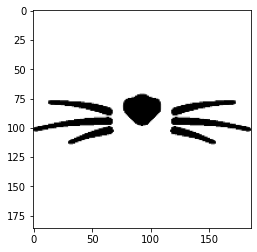

(186, 186, 3)


In [12]:
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

plt.show()
print(img_sticker.shape) #스티커 데이터 사이즈


In [13]:
#스티커 위치 조정하기

refined_x = x - w//2  #Left
refined_y = y - h//2  #Right
refined_x, refined_y = max(0, refined_x), max(0, refined_y)
print('(x,y): (%d,%d)'%(refined_x, refined_y))
print(img_sticker.shape)

(x,y): (545,543)
(186, 186, 3)


In [14]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

(186, 186, 3)


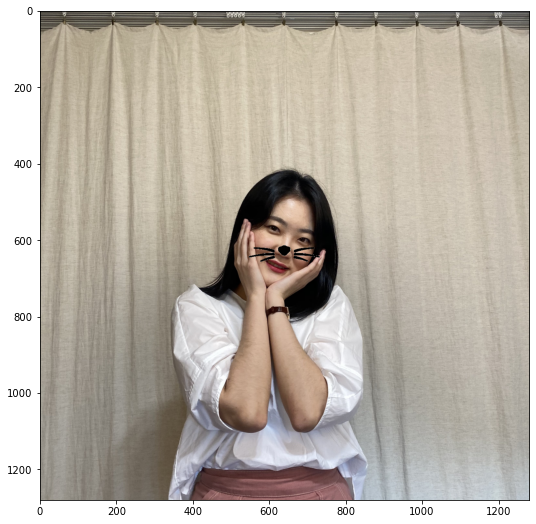

In [16]:
plt.figure(figsize=(9, 9))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### + 스티커를 연하게 만들어 보자~!

위의 수염보다 연해진 스티커의 모습을 확인 할 수 있었다.

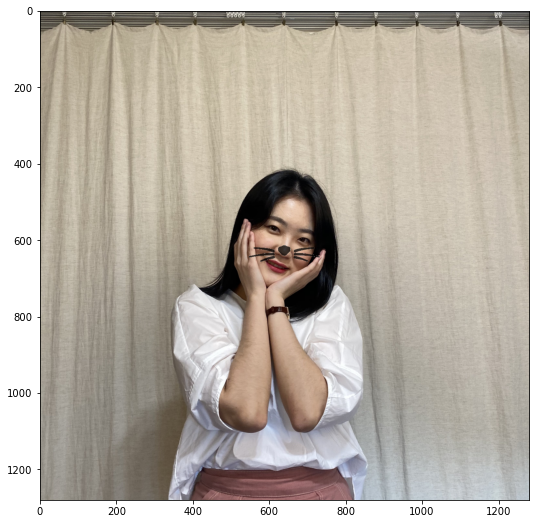

In [21]:
img_back = img_rgb
plt.figure(figsize=(9, 9))
plt.imshow(img_back)
dst = cv2.addWeighted(img_back, 0.25, cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB), 0.75, 0)


plt.imshow(dst)

### 다양한 사진들을 가져와서 적용시켜보자!

파일이 너무 길어져서 처음 불러온 사진과 마지막 결과사진만을 print 하겠습니다~!

### 1. 거리가 먼 사진

- 거리는 크게 문제가 되는 요인이 아닌것 같다고 알수있었습니다.

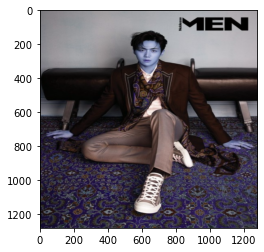

rectangles[[(569, 196) (698, 325)]]
68
(564, 263)
(x,y): (629, 269)
(w,h): (130, 130)
(x,y): (564,204)


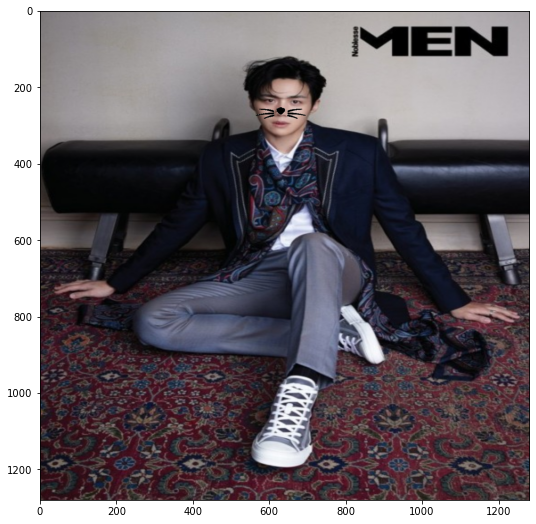

In [26]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/SHfar.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1280))    # 1280x1280의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()  #사진을 보여주세요!

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#plt.imshow(img_rgb)
#plt.show()

#face detector 선언하기 
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표



for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    
#bgr-> rgb 
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
#plt.imshow(img_show_rgb)
#plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))  #랜드마크 갯수 확인해보기 

#랜드마크 얼굴에 표시하기 
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
#plt.imshow(img_show_rgb)
#plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[2])  
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y): (%d, %d)'%(x,y))
    print('(w,h): (%d, %d)'%(w,h))

sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
#plt.imshow(img_sticker)

#plt.show()
#print(img_sticker.shape) #스티커 데이터 사이즈

#스티커 위치 조정하기
refined_x = x - w//2  #Left
refined_y = y - h//2  #Right
refined_x, refined_y = max(0, refined_x), max(0, refined_y)
print('(x,y): (%d,%d)'%(refined_x, refined_y))
#print(img_sticker.shape)

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#print(sticker_area.shape)

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.figure(figsize=(9, 9))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 2. 흑백사진 

슬랙에 올라온 질문중에 흑백사진이 되느냐라는 질문을 보고 궁금해서 실행해 보았다. 

흑백 사진은 bgr에서 rgb로의 변환이 굳이 필요없다고 생각했다. 
사진이 컬러인가, 흑백인가는 이미지 인식에 문제가 없다는 결론을 얻었다.
아마도 face detection은 얼굴의 눈, 코, 입이 정확히 보이는 가의 유무로 나눠진다고 생각한다.

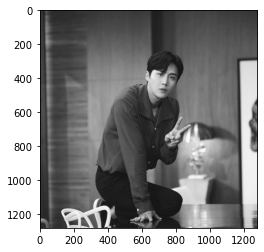

rectangles[[(655, 325) (840, 511)]]


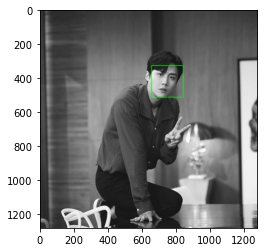

68


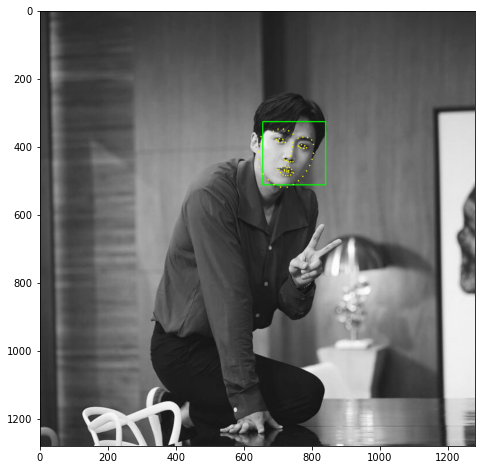

(642, 414)
(x,y): (737, 426)
(w,h): (186, 186)
(x,y): (644,333)
(186, 186, 3)


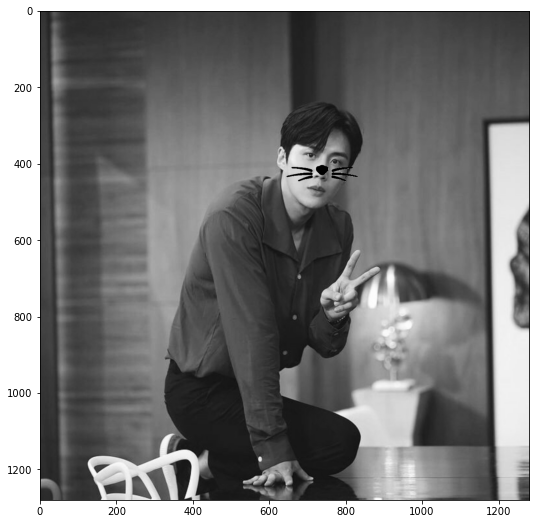

In [30]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/black.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1280))    # 1280x1280의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()  #사진을 보여주세요!

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.흑백 사진이라 바꿀 필요가 없을 것 같다고 생각했습니다.
#img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#plt.imshow(img_rgb)
#plt.show()

#face detector 선언하기 
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표



for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    
#bgr-> rgb 
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

#랜드마크 얼굴에 표시하기 
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
plt.figure(figsize=(8, 8))
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) #bgr-> rgb 
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[2])  # nose center index : 2 또는 30이 제일 잘 붙는듯하다.
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y): (%d, %d)'%(x,y))
    print('(w,h): (%d, %d)'%(w,h))
    

sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
#plt.imshow(img_sticker)
#plt.show()

#print(img_sticker.shape) #스티커 데이터 사이즈


#스티커 위치 조정하기
refined_x = x - w//2  #Left
refined_y = y - h//2  #Right
refined_x, refined_y = max(0, refined_x), max(0, refined_y)
print('(x,y): (%d,%d)'%(refined_x, refined_y))


sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.figure(figsize=(9, 9))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


### 3. 사람이 많은 단체사진은 어떻게 될까?

단체사진이 제일 궁금했었다. 과연 결과는???



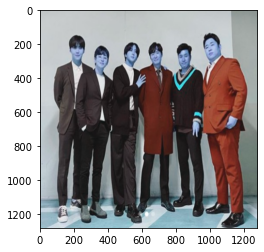

68
68
68
68
68
68


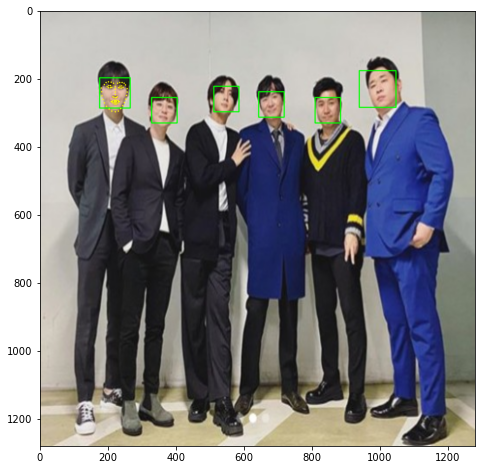

(814, 299)
(x,y): (841, 295)
(w,h): (76, 76)
(969, 249)
(x,y): (994, 231)
(w,h): (109, 109)
(327, 300)
(x,y): (367, 293)
(w,h): (76, 76)
(507, 264)
(x,y): (549, 255)
(w,h): (75, 75)
(651, 284)
(x,y): (678, 276)
(w,h): (76, 76)
(182, 249)
(x,y): (221, 246)
(w,h): (91, 91)
(x,y): (176,201)
(91, 91, 3)


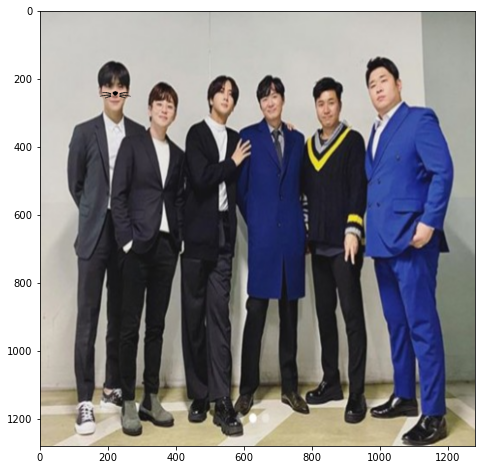

In [32]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/단체사진.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1280))    # 1280x1280의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()  #사진을 보여주세요!

#plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#plt.imshow(img_rgb)
#plt.show()

#face detector 선언하기 
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

#print(dlib_rects)   # 찾은 얼굴영역 좌표


for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

#bgr-> rgb 
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
#plt.imshow(img_show_rgb)
#plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

#랜드마크 얼굴에 표시하기 
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
plt.figure(figsize=(8, 8))
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[2])
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y): (%d, %d)'%(x,y))
    print('(w,h): (%d, %d)'%(w,h))
    

sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
#plt.imshow(img_sticker)
#plt.show()

#print(img_sticker.shape) #스티커 데이터 사이즈


#스티커 위치 조정하기
refined_x = x - w//2  #Left
refined_y = y - h//2  #Right
refined_x, refined_y = max(0, refined_x), max(0, refined_y)
print('(x,y): (%d,%d)'%(refined_x, refined_y))


sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


- 한사람의 얼굴에만 스티커가 붙었다. 바운딩 박스까지는 전원 확인했는데 랜드마크부터 한명만 인식 되었다.

- 랜드마크를 for문으로 여러개 만들어주면 될까?라는 생각에 시도해보는 중인데 잘 안된다ㅜ



### 4. 옆모습은 인식을 할까?

완전 옆모습은 아닌데도 인식을 하지 못하였다. 

비슷한 각도의 옆모습 사진을 시도해보았는데 두번째 사진은 성공하였다.
사진의 화질도 인식의 문제가 되는걸까?

- 흑백인 완전 옆모습 사진도 진행해 보았는데 역시나 아예 bounding box도 붙질 않았다. 

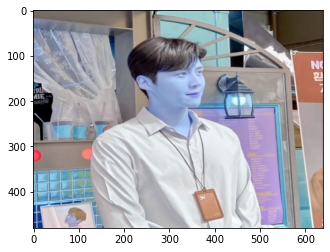

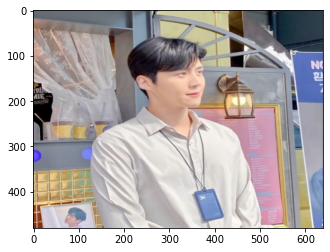

rectangles[]


In [34]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/선호 옆모습.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 1280x1280의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()  #사진을 보여주세요!

#plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#face detector 선언하기 
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표



for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)



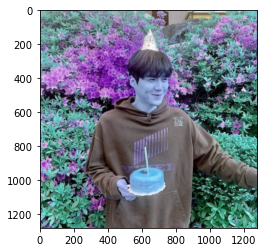

rectangles[[(593, 345) (778, 531)]]
68
(570, 456)
(x,y): (710, 463)
(w,h): (186, 186)
(x,y): (617,370)
(186, 186, 3)


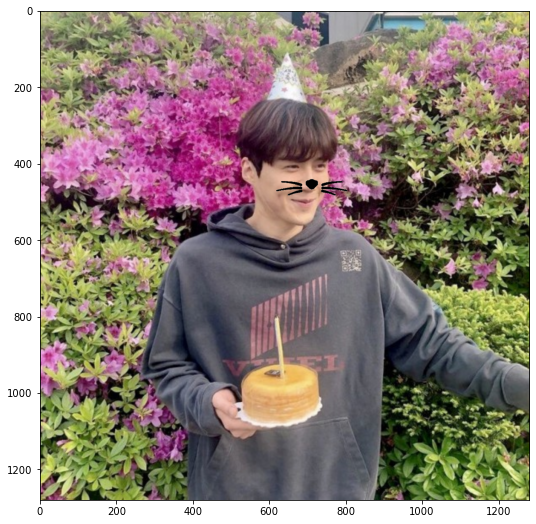

In [37]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/22.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1280, 1280))    # 1280x1280의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()  #사진을 보여주세요!

#plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#face detector 선언하기 
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표


for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)


img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

#랜드마크 얼굴에 표시하기 
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[2])  
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y): (%d, %d)'%(x,y))
    print('(w,h): (%d, %d)'%(w,h))
    
sticker_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

#스티커 위치 조정하기
refined_x = x - w//2  #Left
refined_y = y - h//2  #Right
refined_x, refined_y = max(0, refined_x), max(0, refined_y)
print('(x,y): (%d,%d)'%(refined_x, refined_y))


sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.figure(figsize=(10, 9))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고



## 어려움 : 

### 1. 스티커 이미지 파일 오류

스티커 이미지를 받아오는데 분명히 rgb로 변환작업도 해주었고 배경색도 없고, 혹시몰라 삭제도 해보았는데 검정 배경으로 떠서 이 오류를 해결하는데에 시간이 오래걸렸다.

print(img_sticker.shape)
print(img_sticker[0,0,:])
print(np.where(img_sticker == 255))
print(img_sticker)

위의 코드를 사용해서 이미지의 어레이를 확인해보았는데 원래는 255로 뜨는게 정상인데 0으로 배열이 떴다. 처음엔 이미지를 읽어오지 못하는건가? 싶었는데 질문해본 결과 이미지는 읽어오는데 다른 문제인것 같다고 답변을 받았다.

아직까지 명확히 어떤 문제인것 같다는 모르겠다. 퍼실님께도 물어보았는데 open cv에서 bgr에서 rgb로 변환해줘야 하는데 안한것 같다고 하셨는데 아쉽게도 원인이 아니었다. 슬랙에도 몇몇분 나랑 똑같은 문제를 겪으신것 같았는데 이유를 알게되면 답변을 드려야겠다. 이유를 알고싶다!!

이미지를 아예 삭제하고 처음부터 다시 다운로드를 몇번 받으니 해결되었다...


------------


### 2. 스티커 회전 방법 


얼굴이 살짤 숙인 사진에 자연스러운 스티커 부착을 위해 스티커 자체를 45도정도? 회전하는것을 만들려 했다. 

#### 1차 시도는 cv2.warpAffine함수 사용

--이미지 이동에는 cv2.warpAffine함수 사용한다.

`cv2.warpAffine(이동할 이미지, matrix M, (이미지 넓이, 높이))`


(height, width) = img_sticker.shape[:2]
center = (width // 2, height // 2)
rotate = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img_sticker, rotate, (width, height))
cv2.imshow("Rotated", rotated)

여기서도 중심점과 각도를 변형하는 행렬(Matrix)를 선언하고, 이것은 warpAffine이라는 어려운 함수를 사용해야 합니다.

하지만 위에 코드는 같은 내용을 반복해서 사용해서 코드가 너무 길어지고 복잡하여
다른방법도 찾아보았습니다.


import numpy as np
import cv2

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result
  

#### 2차시도 imutils 함수 사용하기

`pip install imutils` 
   
      
`import imutils`

imutils 함수를 사용하는 것을 권장한다고 쓰여있었는데 다른 함수와 상대적으로 한눈에 보아도 imutils 를 사용해서 깔끔하게 구축가능하다는 것을 알 수 있었다. 

imutils : 이미지 프로세싱의 편의를 위해 만든 라이브러리이다.

imutils 함수를 활용하면 warpAffine사용하는 것보다 쉽다고 해서 시도했는데 
되는가 싶더니 컴퓨터가 자꾸 멈추고 진행이 안되서 무서워서 급 중단했다.

[OpenCV 기초 - Image Processing(Transition, Rotation)](https://enjoyimageprocessing.tistory.com/entry/OpenCV%EC%9D%98-%EA%B8%B0%EC%B4%88-Image-ProcessingTransition-Rotation)

[opencv rotate image 45 degrees-stack overflow](https://stackoverflow.com/questions/9041681/opencv-python-rotate-image-by-x-degrees-around-specific-point)

 
 rotate할 수 있는 방법은 정말 많았다... 적용이 잘 안되서 에러가 자꾸 났다. 
 여러가지 방법으로 회전할 수 있는 방법을 알게되서 좋았다. 제대로 활용해 봐야겠다.


--------------------

### 3. 단체사진 얼굴 인식 

단체사진이 제일 궁금했었다. 처음엔 bounding box가 한명만 인식할 거라고 생각했었다. (전부다 인식은 해서 신기했다.)

원래 했던 코드로 단체사진은 바운딩박스 까지는 가능했는데 랜드마크부터는 한명만 인식이 되었다.

   
랜드마크 지정이 1개여서 1명한테만 스티커가 붙는것 같았다. 


- 1. 단체사진속 모든 인원에게 스티커를 붙여주고 싶다. -> 랜드마크 지정 라인 6개 추가 해야할 것 같다. 


- 2. 내가 원하는 사람 몇명만 지정해서 붙일 수 있을까? -> 이건 코드를 어떻게 짜야할까? 


- 3. 각자 다른 모양의 스티커를 모두에게 붙여주고싶다 -> 스티커 인원수대로 추가, 랜드마크 지정 라인 추가


---------------

### 4. 스티커 좌표

어디를 중심으로 하느냐에 따라 스티커를 자연스럽게 붙일 수 있다.

처음에는 좌표설정에 이해가 잘 안가서 스티커가 좀처럼 내려오지를 않았다.계속해서 입력해보면서 이마에 있던 스티커를 점점 아래로 내리면서 이리 저리 움직여도 보면서 스티커를 붙여보았다. 어느정도 감은 찾은것 같다. 

개인적으로는 left chin[2]을 중심으로 하는게 제일 자연스럽다고 생각했다. 코 끝[33], 코 중심[30]도 괜찮았었다!

콧대 [28], [29]는 조금 스티커가 조금 어색하게 붙었다.

## 느낀점

- 이미지 처리 활용 능력 부족 
1번째 오류부터 이미지를 다루는데 이해가 부족한 것 같았다. 

[이미지처리 PTL 총정리](https://ddolcat.tistory.com/690) 이곳을 참고해 이미지 처리에 대해 조금 공부해보았다. 

- Open CV를 활용할 수 있는 것이 정말 많다.

` "Open CV는 아주 강력하고 방대한 기능을 갖춘 컴퓨터 비전 라이브러리입니다."` 라는 말이 무슨말인지 정말 확 와닿으며 이해가 갔다.

궁금한점을 이래저래 찾아보다가 차량 이미지 중에서 번호판 부분을 찾아 인식하고, 숫자 인식을 활용해 seven-segement display 인식기를 만들어보는 등 다양한 미니 프로젝트들이 많아서 찾아보면서 흥미가 많이 생겼다. (ex: 신용카드 OCR인식)


내주변에 정말 많은 곳에 이미 적용되어 있는데 아무생각 없이 살고있었다는 생각이 들었다. 반대로 작은 하나를 볼때도 바라보는 시각이 조금은 달라진것을 느꼈다. 남은 노드들을 배우면서 계속 지식을 쌓아갈 생각을 하니 재미있을 것 같다! 

- 구글 검색을 통해 코드는 알게 되었는데 어디선가 잘못되었는지 오류가 나서 적용이 안되서 답답했다. 꼭 다시 적용해서 성공해볼 것이다.

### 🔎OpenCV 에서  Basic image processing 는 9가지가 있다. 

+ 1: Translation (상하, 좌우 이동)


+ 2: Rotation (그림의 회전 ,중심축이 어디냐?)


+ 3: Resizing (이미지의 사이즈 조정, Aspect Ratio고려)


+ 4: Flipping (수평, 수직으로 뒤집기)


+ 5: Cropping (그림 일부만 가져오기)


+ 6: Image arithmetic (그림을 더 진하게, 연하게 만들기)


+ 7: Bitwise operations (그림의 Bit 연산)


+ 8: Masking (마스크)


+ 9: Splitting and merging channels ( Color Channel 로 나누고, 합치고)
